# 3.2.5 [Random Forest: guided example](https://courses.thinkful.com/data-201v1/project/3.2.5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

Here we'll use data from Lending Club to predict the state of a loan given some information about it. You can find the dataset [here](https://www.lendingclub.com/info/download-data.action). We'll use 2015 data. ([Thinkful mirror](https://www.dropbox.com/s/m7z42lubaiory33/LoanStats3d.csv?dl=0))

In [2]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'unit_3_data/LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

y2015.drop(['id', 'member_id', 'funded_amnt', 'url', 'emp_title', 'zip_code', 'earliest_cr_line', 
            'revol_util', 'sub_grade', 'addr_state', 'desc'], 
           1, inplace=True)

y2015.drop(y2015.columns[y2015.columns.str.contains('inv', case=False)],axis=1, inplace=True)

# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]
y2015 = y2015.dropna(axis=1)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015_clean = y2015.drop(y2015.columns[y2015.columns.str.contains('pymnt|amnt|bal|amt|prncp|rec|installment|grade')],axis=1)

rfc_clean = ensemble.RandomForestClassifier()
X_clean = y2015_clean.drop('loan_status', 1)
Y = y2015_clean['loan_status']
X_clean = pd.get_dummies(X_clean)

rfc_clean.fit(X_clean,Y)

df_importance = pd.DataFrame(data = {'features':X_clean.columns, 
                                     'importance':rfc_clean.feature_importances_})

X_clean = X_clean[df_importance[df_importance['importance']>=.005].features.values]
#print(df_importance[df_importance['importance']>=.005])
#print(X_clean)

In [4]:
cross_val_score(rfc_clean, X_clean, Y, cv=10)

array([0.66327088, 0.66338961, 0.66422075, 0.66493315, 0.66651627,
       0.659962  , 0.66190126, 0.65902776, 0.66335764, 0.40987033])

In [5]:
print(df_importance[df_importance['importance']>=.005].sort_values(by='importance', ascending=False))

                               features  importance
2                                   dti    0.052511
13                 mo_sin_old_rev_tl_op    0.049452
30                      tot_hi_cred_lim    0.048768
31                       total_bc_limit    0.047460
10                     total_rev_hi_lim    0.047345
0                              int_rate    0.047012
1                            annual_inc    0.045726
32           total_il_high_credit_limit    0.044021
6                             total_acc    0.040029
14                mo_sin_rcnt_rev_tl_op    0.036467
22                            num_il_tl    0.035350
21                            num_bc_tl    0.033358
15                       mo_sin_rcnt_tl    0.033089
11                 acc_open_past_24mths    0.029473
28                       pct_tl_nvr_dlq    0.029045
24                             num_sats    0.028770
23                        num_op_rev_tl    0.028699
5                              open_acc    0.028587
19          

In [129]:
y2015.columns[y2015.columns.str.contains('inv|funded_amnt|id', case=False)]

Index(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'out_prncp_inv',
       'total_pymnt_inv'],
      dtype='object')

In [82]:
y2015['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)'], dtype=object)

# The Blind Approach
* Use everything we got in a Random Forest without thought
* Independent variables must be numeric, use pandas get_dummies to execute this 

In [6]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)



In [7]:
rfc.fit(X,Y)

df_importance = pd.DataFrame(data = {'features':X.columns, 
                                     'importance':rfc.feature_importances_})

X = X[df_importance[df_importance['importance']>=.005].features.values]
print(df_importance.sort_values(by='importance', ascending=False))

                       features  importance
11                    out_prncp    0.314728
18              last_pymnt_amnt    0.233977
13              total_rec_prncp    0.140376
12                  total_pymnt    0.037574
16                   recoveries    0.033236
14                total_rec_int    0.023982
0                     loan_amnt    0.021539
2                   installment    0.018909
17      collection_recovery_fee    0.014660
1                      int_rate    0.005920
9                     revol_bal    0.005444
3                    annual_inc    0.005392
50               total_bc_limit    0.005378
4                           dti    0.005339
24             total_rev_hi_lim    0.005268
29         mo_sin_old_rev_tl_op    0.005210
48              tot_hi_cred_lim    0.005163
49            total_bal_ex_mort    0.005113
23                  tot_cur_bal    0.004970
26                  avg_cur_bal    0.004896
25         acc_open_past_24mths    0.004373
51   total_il_high_credit_limit 

In [8]:
cross_val_score(rfc, X, Y, cv=10)

array([0.90071478, 0.97124267, 0.96644582, 0.96207642, 0.96072192,
       0.96074567, 0.9611722 , 0.96095846, 0.96071912, 0.96067069])

In [9]:
X.head()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,total_rev_hi_lim,mo_sin_old_rev_tl_op,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit
0,16000.0,14.85,379.39,48000.0,33.18,19108.0,13668.88,4519.68,2331.12,2188.56,0.0,0.0,379.39,284700.0,294.0,298100.0,31329.0,281300.0
1,9600.0,7.49,298.58,60000.0,22.44,7722.0,6635.69,3572.97,2964.31,608.66,0.0,0.0,298.58,13000.0,91.0,88635.0,55387.0,12500.0
2,25000.0,7.49,777.55,109000.0,26.02,20862.0,0.00,26224.23,25000.00,1224.23,0.0,0.0,20807.39,38400.0,168.0,373572.0,68056.0,38400.0
3,28000.0,6.49,858.05,92000.0,21.60,51507.0,19263.77,10271.36,8736.23,1535.13,0.0,0.0,858.05,79900.0,379.0,304003.0,74920.0,41500.0
4,8650.0,19.89,320.99,55000.0,25.49,9568.0,0.00,9190.49,8650.00,540.49,0.0,0.0,8251.42,20750.0,95.0,38998.0,18926.0,2750.0


In [12]:
rfc = ensemble.RandomForestClassifier()

rfc.fit(X,Y)

df_importance = pd.DataFrame(data = {'features':X.columns, 
                                     'importance':rfc.feature_importances_})

X = X[df_importance[df_importance['importance']>=.005].features.values]
#print(X.sort_values(by='importance', ascending=False))

In [14]:
df_importance[df_importance['importance']>=.005].sort_values(by='importance', ascending=False)

,features,importance
6,out_prncp,0.450706
12,last_pymnt_amnt,0.164156
8,total_rec_prncp,0.099712
7,total_pymnt,0.083965
2,installment,0.028658
10,recoveries,0.026436
9,total_rec_int,0.025135
0,loan_amnt,0.022841
11,collection_recovery_fee,0.014631
5,revol_bal,0.010990


In [15]:
cross_val_score(rfc, X, Y, cv=10)

array([0.90040607, 0.97015032, 0.96635083, 0.96210016, 0.96105438,
       0.96057943, 0.96093472, 0.96079223, 0.96081412, 0.96062319])

In [16]:
X = X[df_importance[df_importance['importance']>=.01].features.values]

rfc = ensemble.RandomForestClassifier()
rfc.fit(X,Y)

df_importance = pd.DataFrame(data = {'features':X.columns, 'importance':rfc.feature_importances_})

#X = X[df_importance[df_importance['importance']>=.005].features.values]
#print(X.sort_values(by='importance', ascending=False))

In [17]:
df_importance[df_importance['importance']>=.005].sort_values(by='importance', ascending=False)

,features,importance
4,out_prncp,0.368718
10,last_pymnt_amnt,0.246823
5,total_pymnt,0.102867
6,total_rec_prncp,0.095675
1,installment,0.035116
7,total_rec_int,0.032216
9,collection_recovery_fee,0.028827
0,loan_amnt,0.025036
8,recoveries,0.023555
3,revol_bal,0.021054


In [18]:
cross_val_score(rfc, X, Y, cv=10)

array([0.82840588, 0.9717651 , 0.9651635 , 0.96055662, 0.9591071 ,
       0.95839468, 0.95514023, 0.95853618, 0.9600779 , 0.96074194])

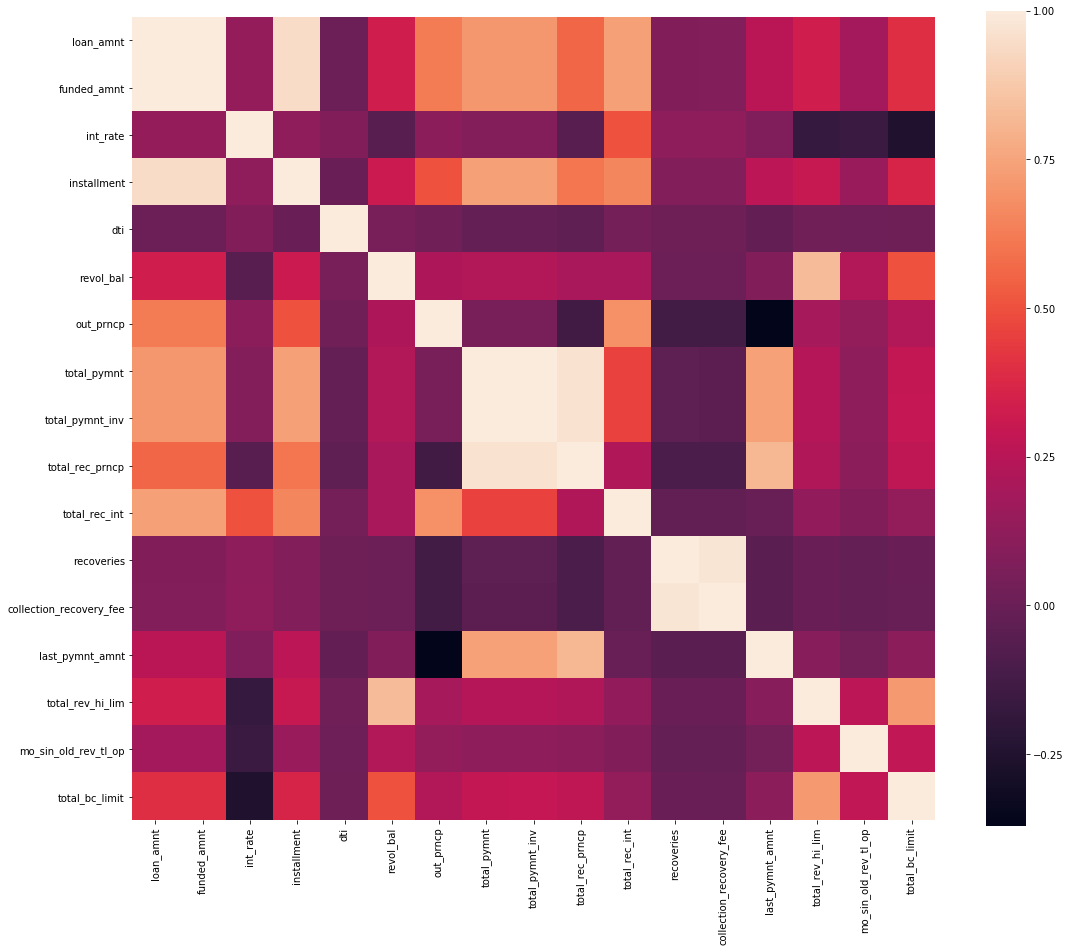

In [120]:

corrmat = X.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(18, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, square=True)
plt.show()

In [59]:
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]])
         )

1. feature out_prncp (0.155225)
2. feature last_pymnt_d_Jan-2017 (0.110969)
3. feature next_pymnt_d_Feb-2017 (0.110929)
4. feature last_pymnt_amnt (0.089238)
5. feature total_rec_prncp (0.081095)
6. feature last_credit_pull_d_Jan-2017 (0.075082)
7. feature total_pymnt (0.043510)
8. feature out_prncp_inv (0.040792)
9. feature last_pymnt_d_Dec-2016 (0.040587)
10. feature total_pymnt_inv (0.023403)
11. feature recoveries (0.023327)
12. feature next_pymnt_d_Jan-2017 (0.016138)
13. feature installment (0.015220)
14. feature total_rec_int (0.014643)
15. feature last_pymnt_d_Oct-2016 (0.011802)
16. feature last_pymnt_d_Nov-2016 (0.011517)
17. feature last_credit_pull_d_Oct-2016 (0.010877)
18. feature last_pymnt_d_Sep-2016 (0.010217)
19. feature loan_amnt (0.009078)
20. feature funded_amnt (0.007838)
21. feature funded_amnt_inv (0.005323)
22. feature last_pymnt_d_Jul-2016 (0.004807)
23. feature member_id (0.004757)
24. feature int_rate (0.003739)
25. feature last_pymnt_d_Aug-2016 (0.003542)
26

Feature ranking:
1. feature out_prncp (0.155225)


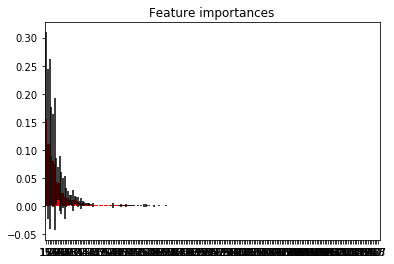

2. feature last_pymnt_d_Jan-2017 (0.110969)


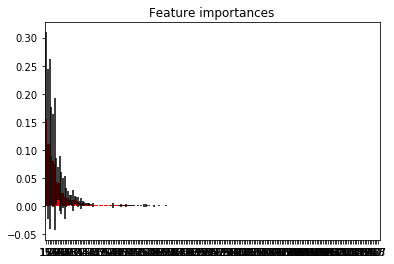

3. feature next_pymnt_d_Feb-2017 (0.110929)


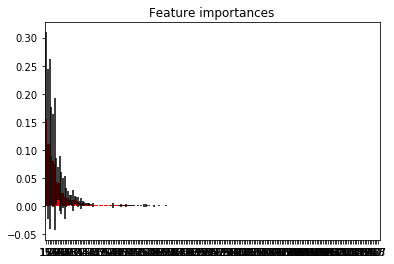

4. feature last_pymnt_amnt (0.089238)


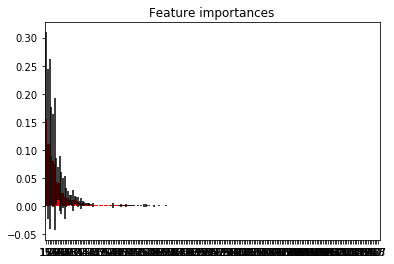

5. feature total_rec_prncp (0.081095)


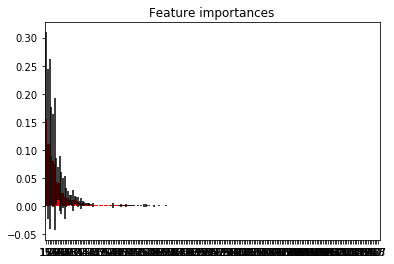

6. feature last_credit_pull_d_Jan-2017 (0.075082)


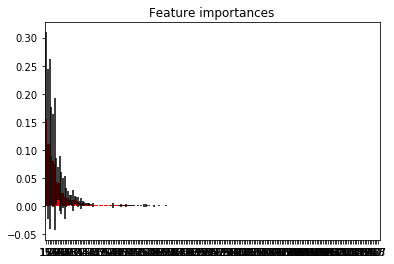

7. feature total_pymnt (0.043510)


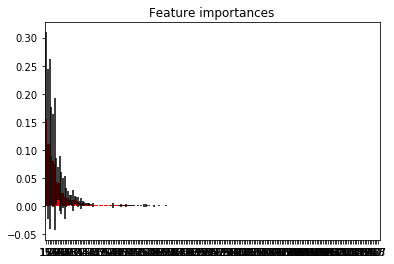

8. feature out_prncp_inv (0.040792)


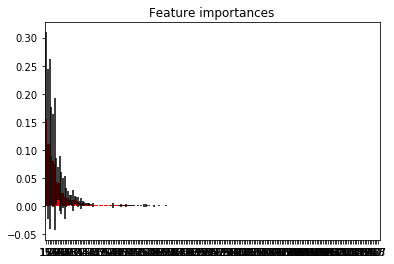

9. feature last_pymnt_d_Dec-2016 (0.040587)


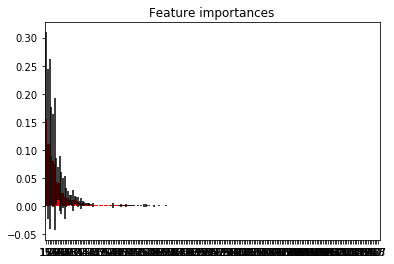

10. feature total_pymnt_inv (0.023403)


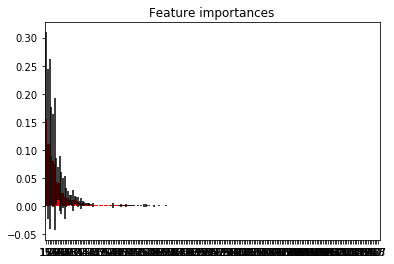

11. feature recoveries (0.023327)


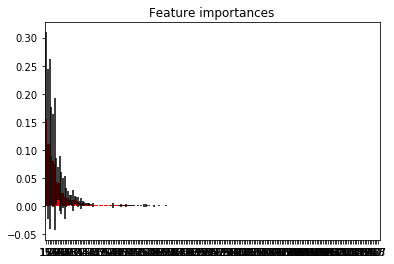

12. feature next_pymnt_d_Jan-2017 (0.016138)


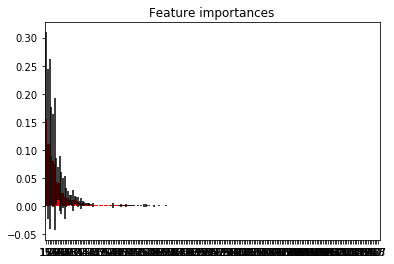

13. feature installment (0.015220)


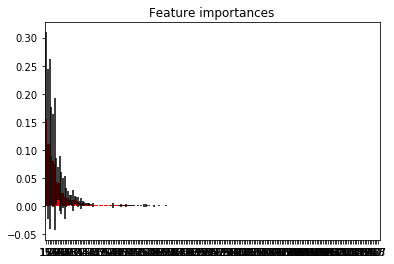

14. feature total_rec_int (0.014643)


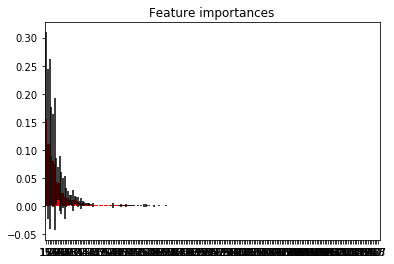

15. feature last_pymnt_d_Oct-2016 (0.011802)


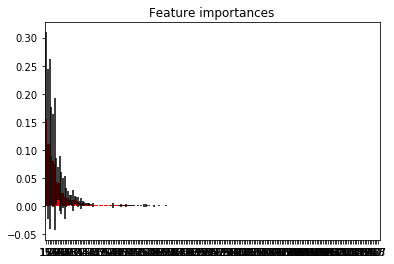

16. feature last_pymnt_d_Nov-2016 (0.011517)


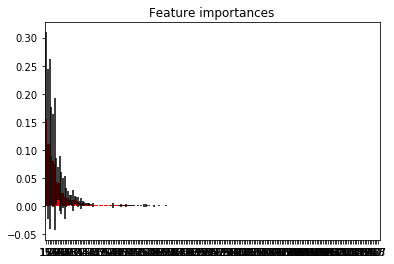

17. feature last_credit_pull_d_Oct-2016 (0.010877)


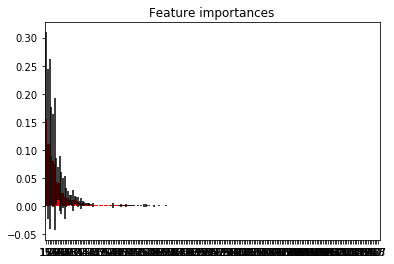

18. feature last_pymnt_d_Sep-2016 (0.010217)


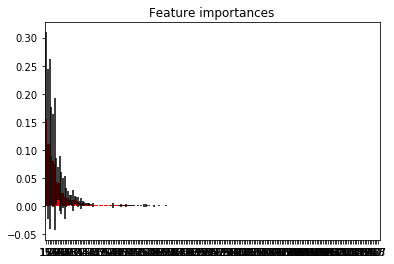

19. feature loan_amnt (0.009078)


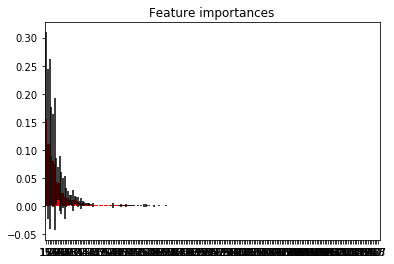

20. feature funded_amnt (0.007838)


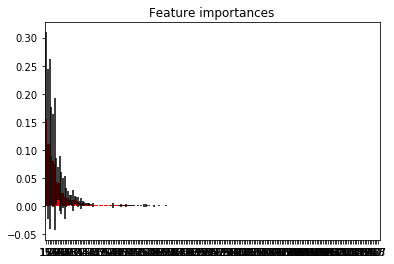

21. feature funded_amnt_inv (0.005323)


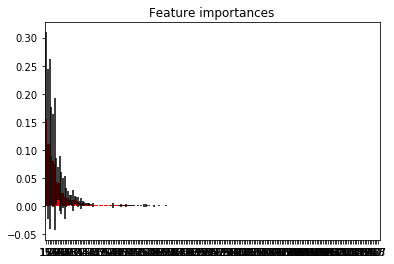

22. feature last_pymnt_d_Jul-2016 (0.004807)


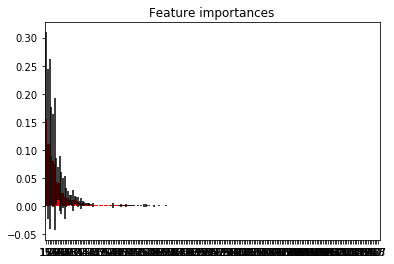

23. feature member_id (0.004757)


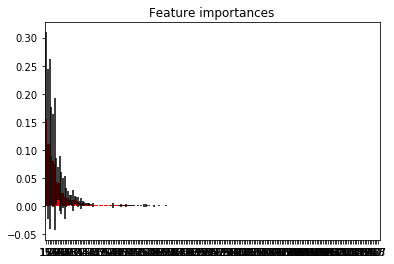

24. feature int_rate (0.003739)


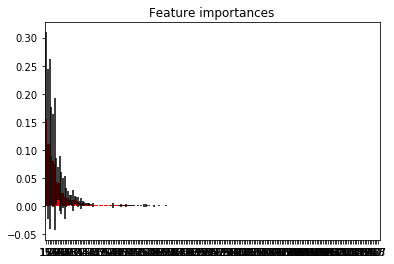

25. feature last_pymnt_d_Aug-2016 (0.003542)


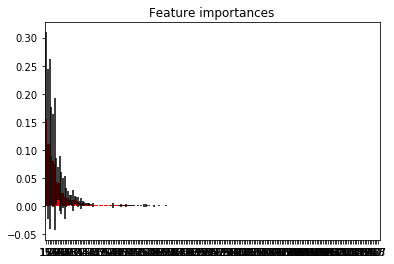

26. feature revol_bal (0.003278)


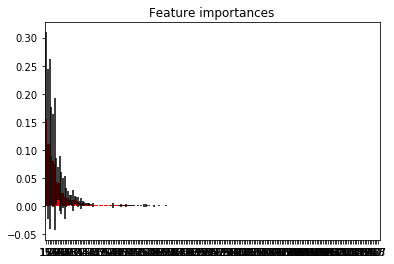

27. feature total_bc_limit (0.003010)


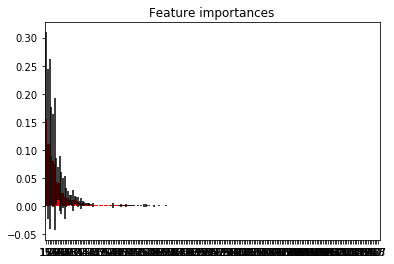

28. feature id (0.002613)


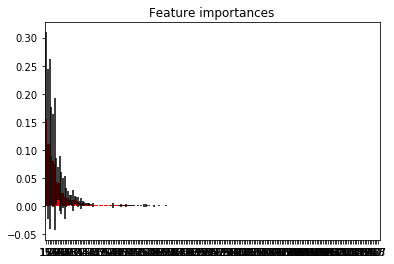

29. feature collection_recovery_fee (0.002597)


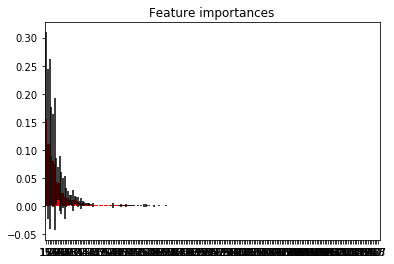

30. feature total_rec_late_fee (0.002148)


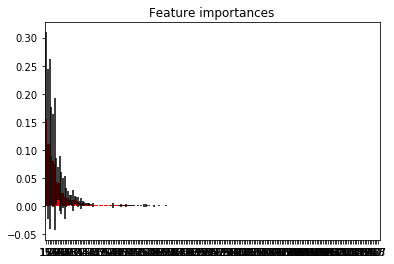

31. feature dti (0.002072)


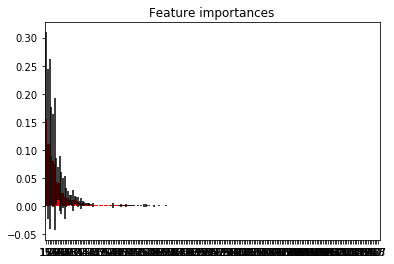

32. feature total_rev_hi_lim (0.002022)


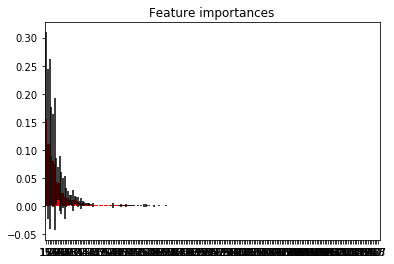

33. feature tot_cur_bal (0.001947)


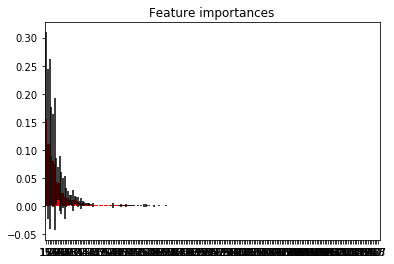

34. feature annual_inc (0.001939)


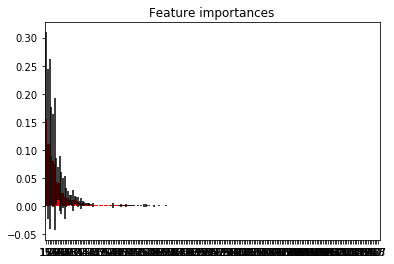

35. feature total_bal_ex_mort (0.001922)


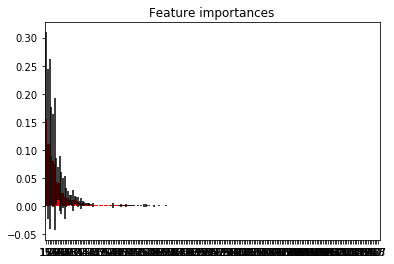

36. feature mo_sin_old_rev_tl_op (0.001894)


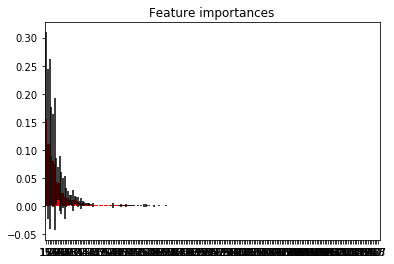

37. feature tot_hi_cred_lim (0.001877)


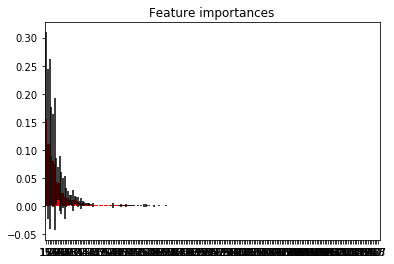

38. feature avg_cur_bal (0.001824)


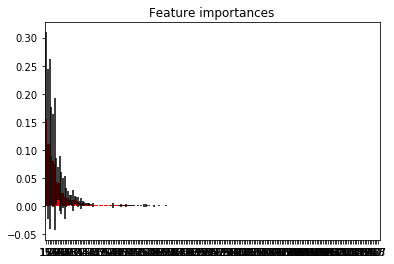

39. feature total_il_high_credit_limit (0.001769)


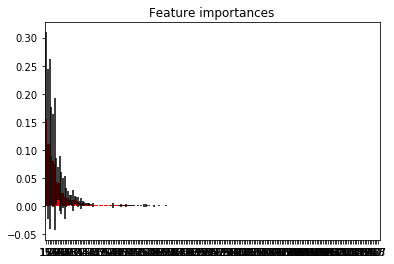

40. feature total_acc (0.001631)


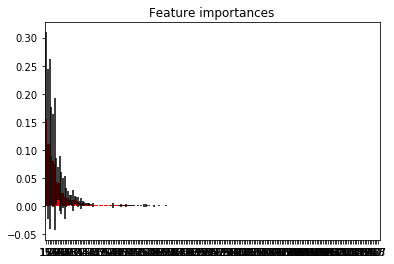

41. feature last_credit_pull_d_Apr-2016 (0.001622)


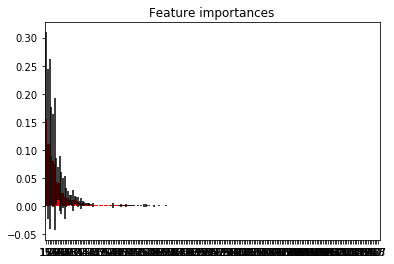

42. feature mo_sin_rcnt_rev_tl_op (0.001474)


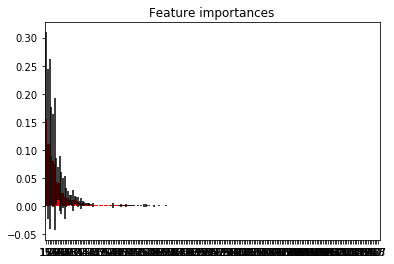

43. feature num_il_tl (0.001462)


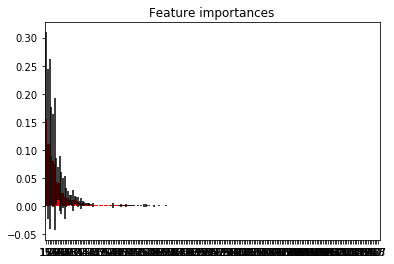

44. feature acc_open_past_24mths (0.001441)


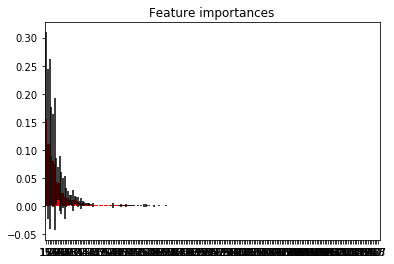

45. feature mo_sin_rcnt_tl (0.001328)


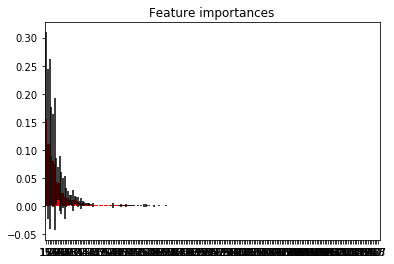

46. feature last_credit_pull_d_Dec-2016 (0.001295)


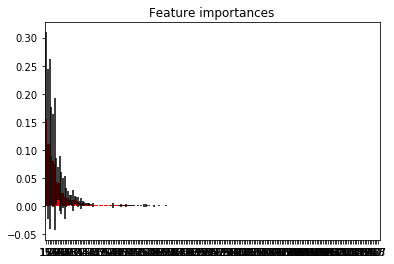

47. feature num_bc_tl (0.001293)


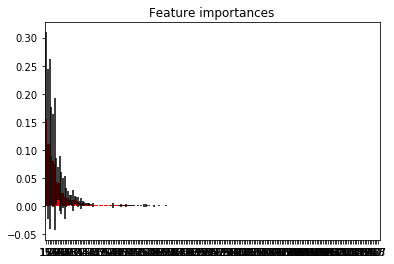

48. feature num_bc_sats (0.001284)


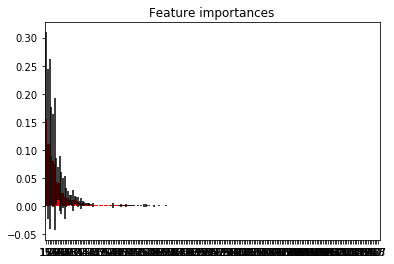

49. feature last_pymnt_d_Oct-2015 (0.001283)


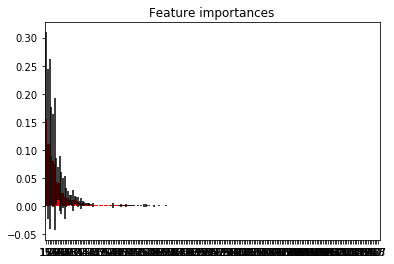

50. feature pct_tl_nvr_dlq (0.001280)


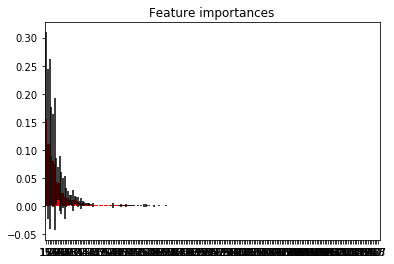

51. feature open_acc (0.001228)


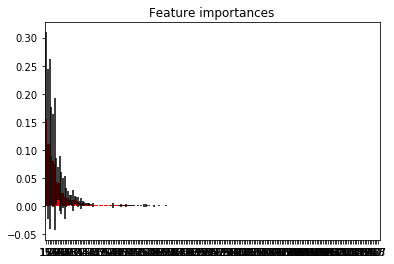

52. feature num_sats (0.001221)


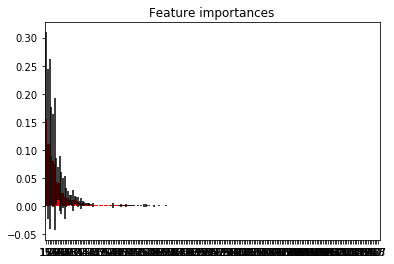

53. feature num_op_rev_tl (0.001180)


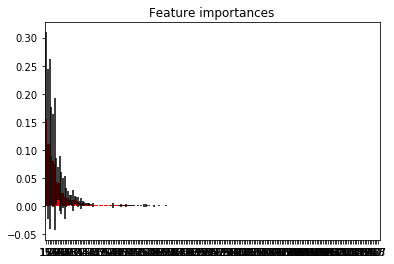

54. feature num_rev_tl_bal_gt_0 (0.001176)


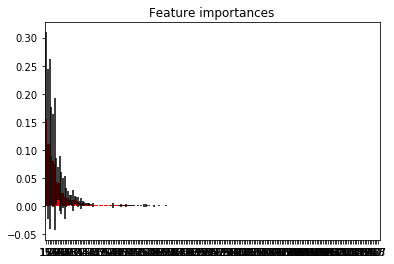

55. feature num_actv_bc_tl (0.001066)


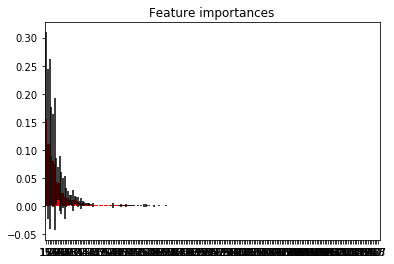

56. feature num_actv_rev_tl (0.001065)


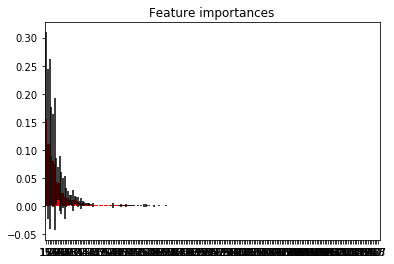

57. feature num_tl_op_past_12m (0.001013)


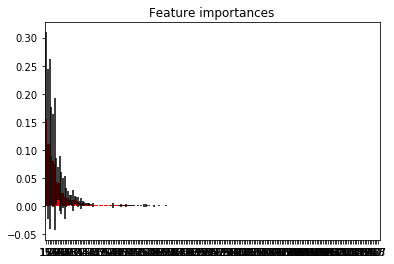

58. feature term_ 60 months (0.000895)


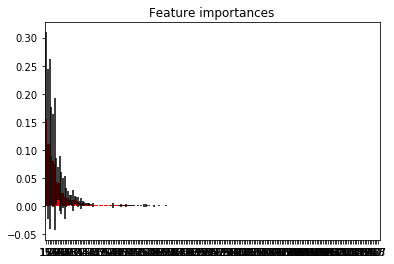

59. feature mort_acc (0.000863)


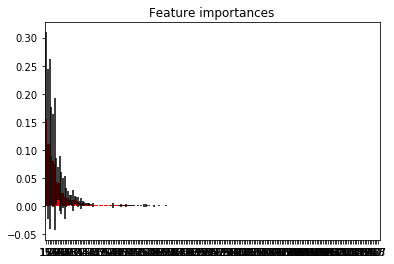

60. feature last_pymnt_d_Jun-2015 (0.000792)


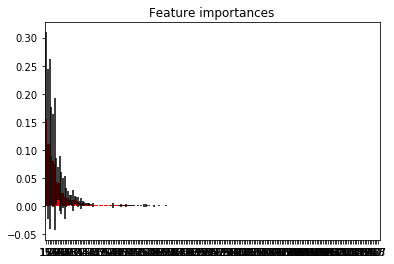

61. feature last_pymnt_d_Mar-2016 (0.000763)


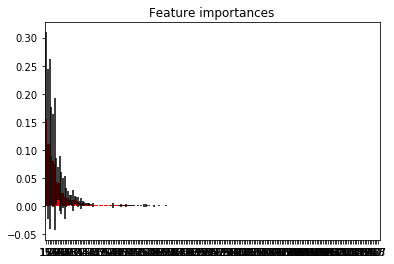

62. feature term_ 36 months (0.000738)


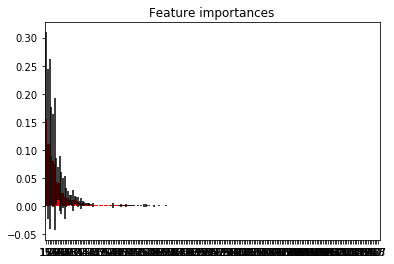

63. feature initial_list_status_f (0.000647)


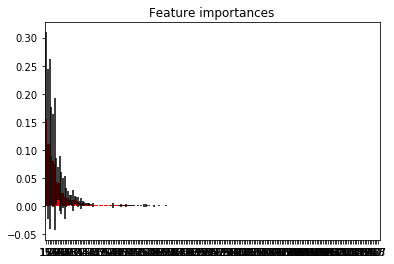

64. feature inq_last_6mths (0.000646)


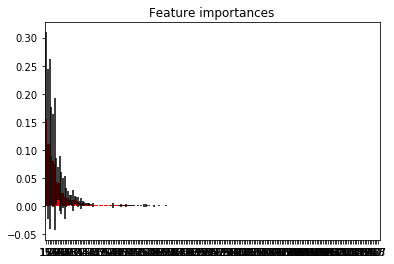

65. feature tot_coll_amt (0.000637)


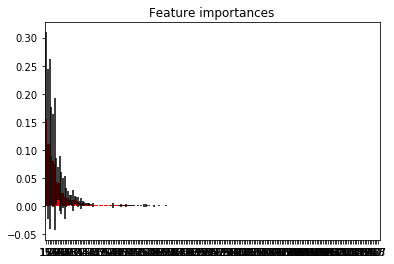

66. feature last_pymnt_d_Aug-2015 (0.000610)


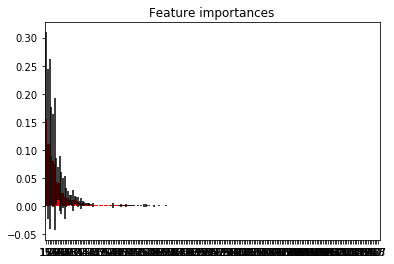

67. feature delinq_2yrs (0.000579)


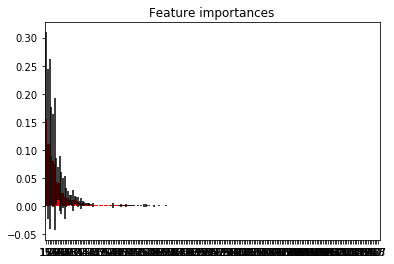

68. feature num_accts_ever_120_pd (0.000492)


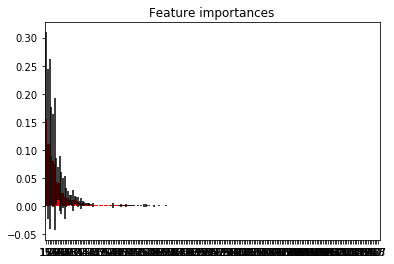

69. feature last_pymnt_d_Jun-2016 (0.000443)


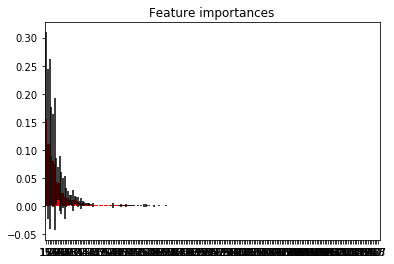

70. feature pub_rec (0.000388)


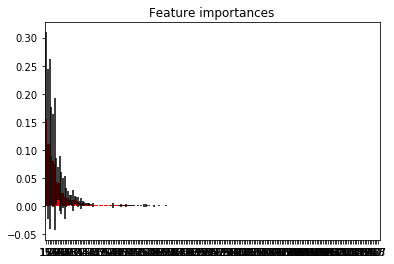

71. feature issue_d_Jun-2015 (0.000382)


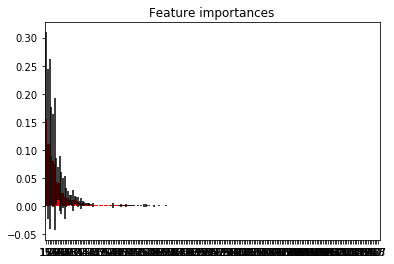

72. feature last_pymnt_d_May-2016 (0.000372)


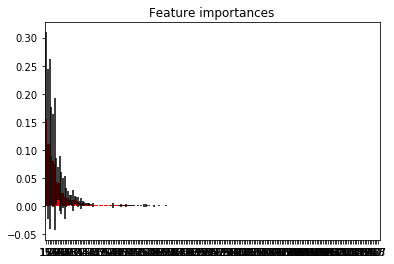

73. feature last_pymnt_d_Nov-2015 (0.000354)


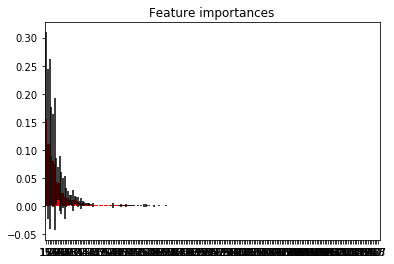

74. feature grade_F (0.000329)


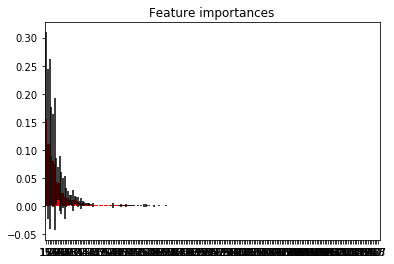

75. feature verification_status_Not Verified (0.000323)


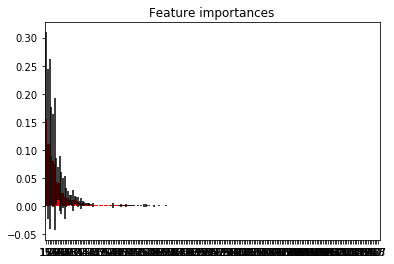

76. feature home_ownership_RENT (0.000313)


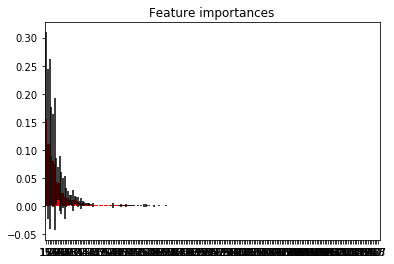

77. feature grade_B (0.000310)


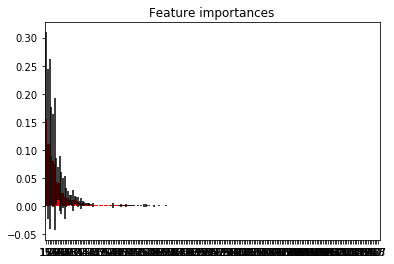

78. feature initial_list_status_w (0.000308)


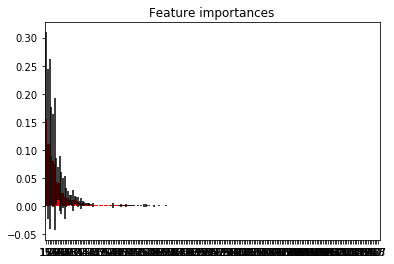

79. feature emp_length_10+ years (0.000307)


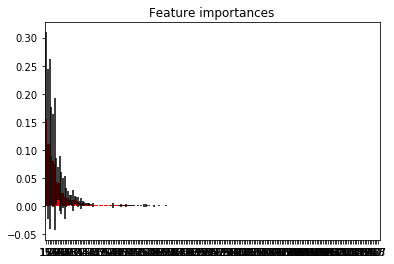

80. feature verification_status_Source Verified (0.000303)


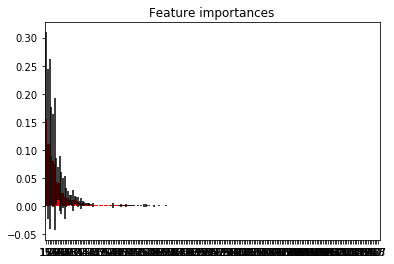

81. feature verification_status_Verified (0.000280)


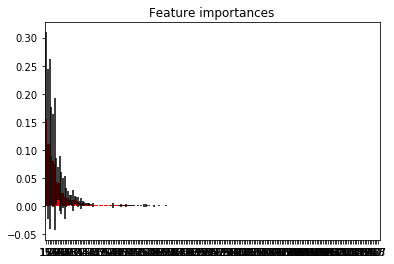

82. feature purpose_debt_consolidation (0.000280)


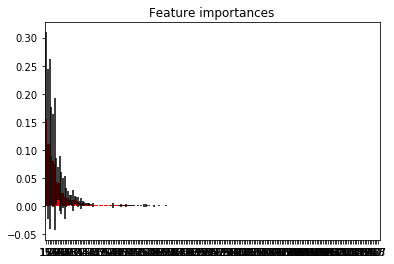

83. feature last_pymnt_d_Apr-2016 (0.000278)


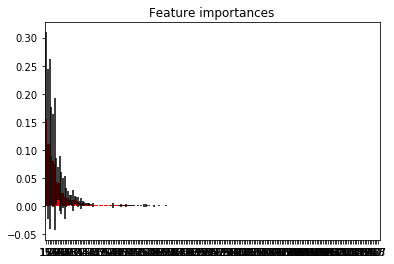

84. feature title_Debt consolidation (0.000278)


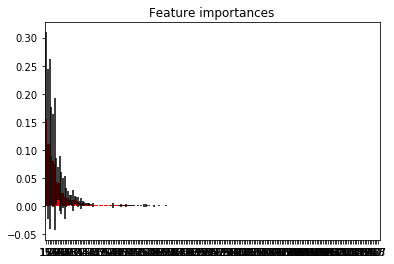

85. feature num_tl_90g_dpd_24m (0.000268)


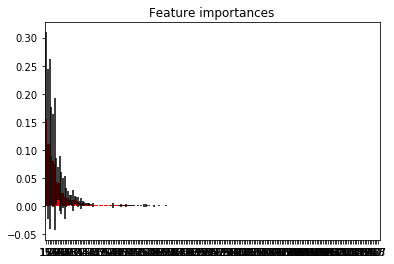

86. feature pub_rec_bankruptcies (0.000263)


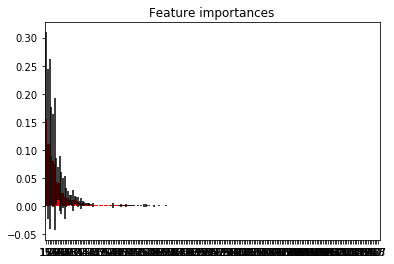

87. feature home_ownership_MORTGAGE (0.000259)


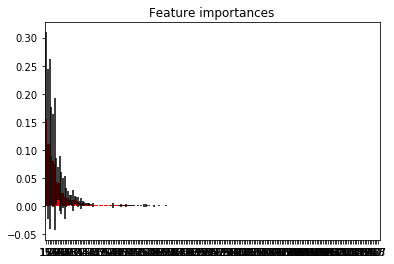

88. feature issue_d_Jul-2015 (0.000257)


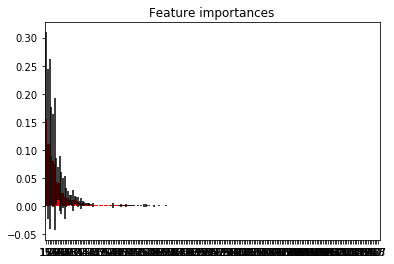

89. feature grade_C (0.000256)


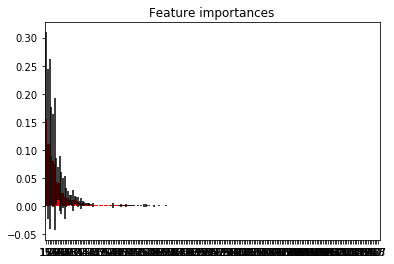

90. feature grade_D (0.000247)


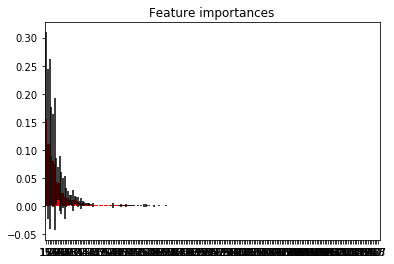

91. feature emp_length_2 years (0.000246)


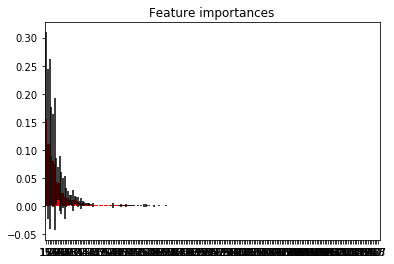

92. feature grade_A (0.000236)


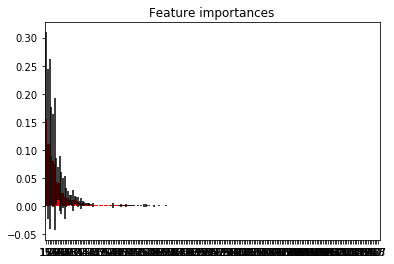

93. feature title_Credit card refinancing (0.000230)


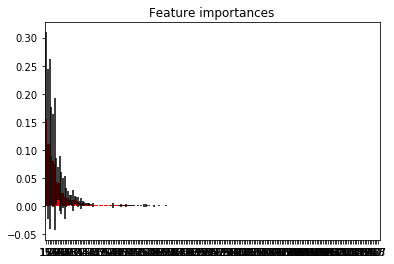

94. feature purpose_credit_card (0.000225)


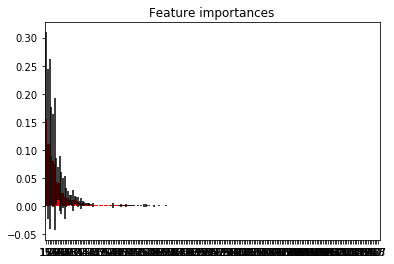

95. feature home_ownership_OWN (0.000224)


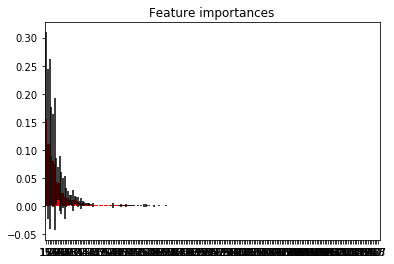

96. feature issue_d_Aug-2015 (0.000224)


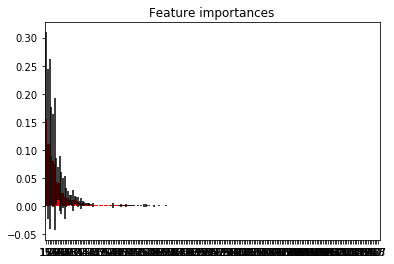

97. feature tax_liens (0.000215)


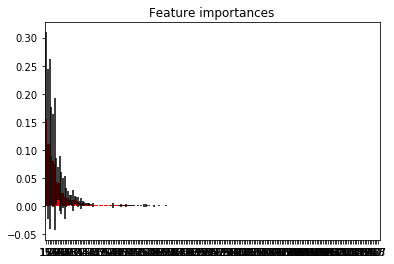

98. feature emp_length_3 years (0.000214)


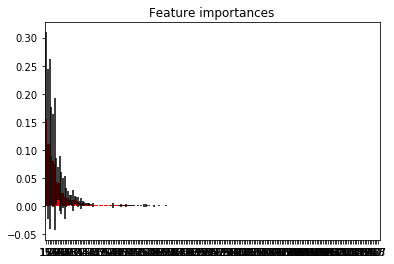

99. feature emp_length_< 1 year (0.000209)


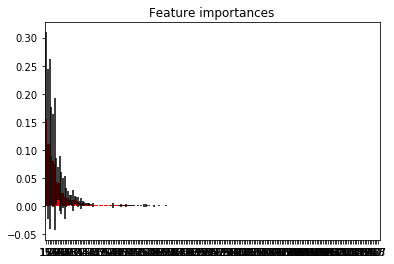

100. feature grade_E (0.000208)


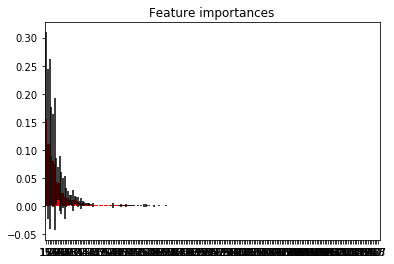

101. feature issue_d_Oct-2015 (0.000207)


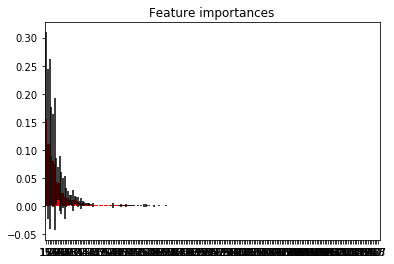

102. feature issue_d_Dec-2015 (0.000201)


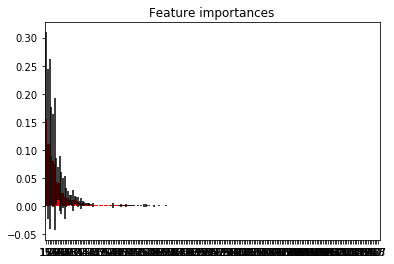

103. feature issue_d_Apr-2015 (0.000197)


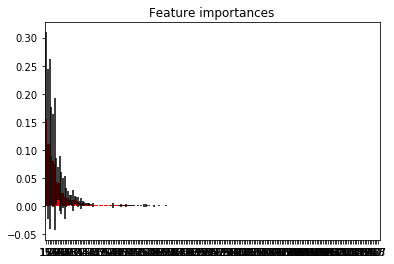

104. feature emp_length_5 years (0.000192)


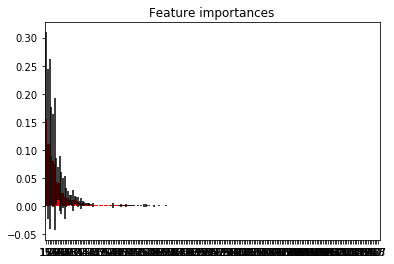

105. feature issue_d_Mar-2015 (0.000192)


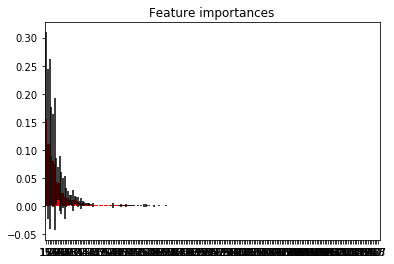

106. feature emp_length_4 years (0.000191)


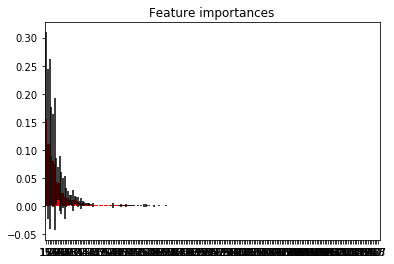

107. feature emp_length_1 year (0.000190)


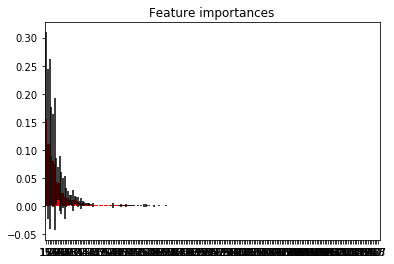

108. feature emp_length_8 years (0.000185)


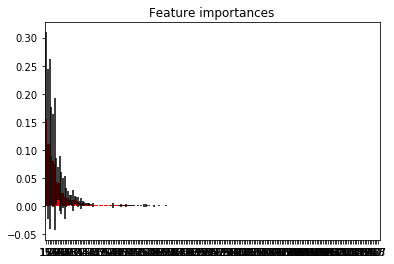

109. feature issue_d_May-2015 (0.000179)


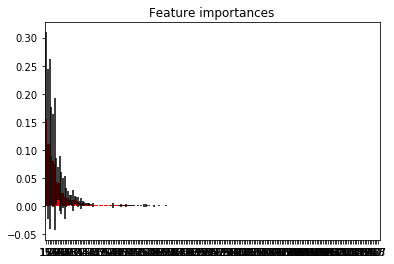

110. feature last_credit_pull_d_Jul-2016 (0.000178)


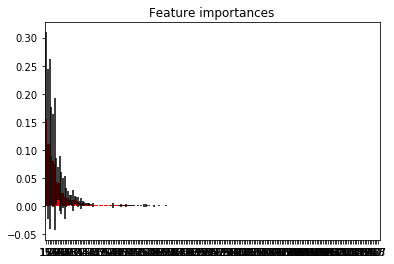

111. feature issue_d_Nov-2015 (0.000172)


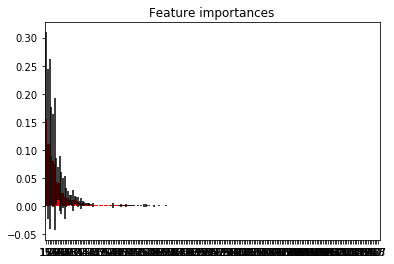

112. feature issue_d_Sep-2015 (0.000167)


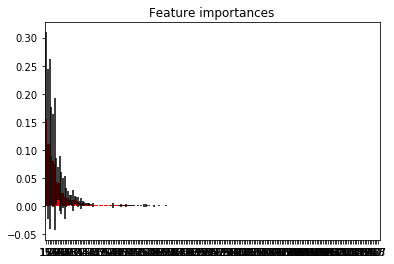

113. feature issue_d_Jan-2015 (0.000161)


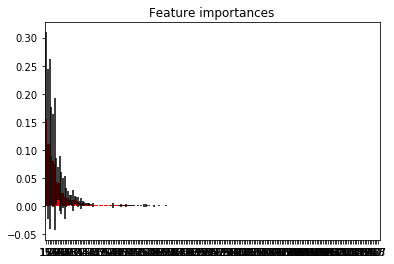

114. feature emp_length_7 years (0.000153)


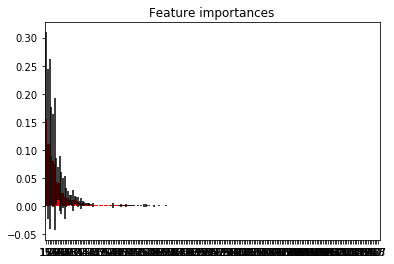

115. feature issue_d_Feb-2015 (0.000149)


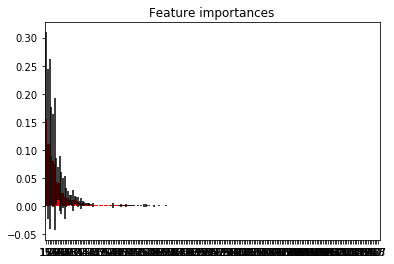

116. feature last_credit_pull_d_Feb-2016 (0.000147)


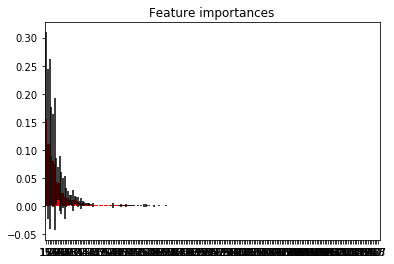

117. feature last_credit_pull_d_Mar-2016 (0.000144)


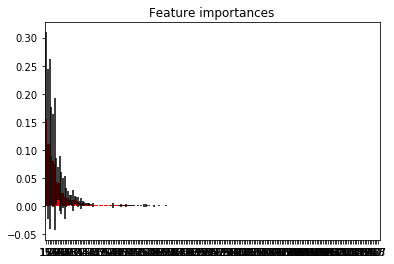

118. feature emp_length_6 years (0.000143)


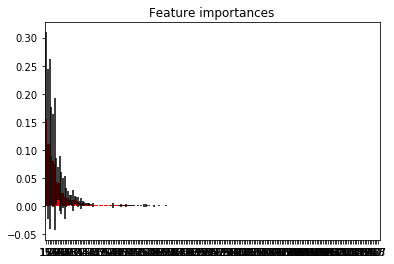

119. feature emp_length_9 years (0.000140)


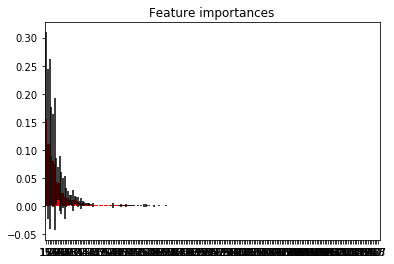

120. feature purpose_other (0.000137)


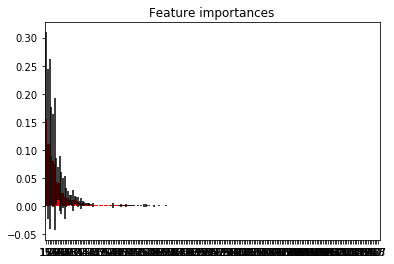

121. feature purpose_home_improvement (0.000127)


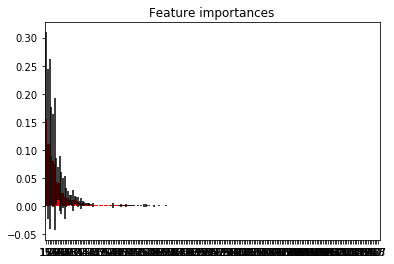

122. feature title_Other (0.000126)


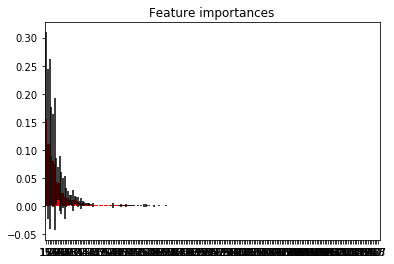

123. feature title_Home improvement (0.000125)


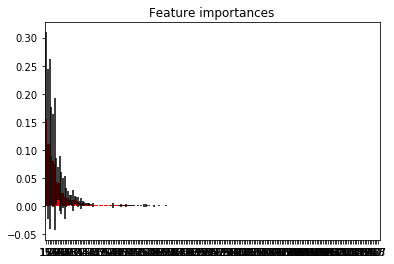

124. feature collections_12_mths_ex_med (0.000115)


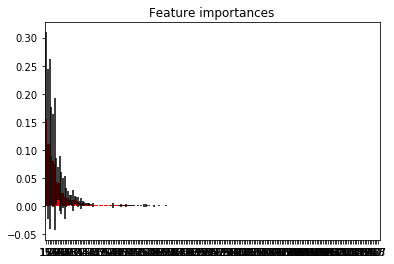

125. feature last_credit_pull_d_Nov-2016 (0.000114)


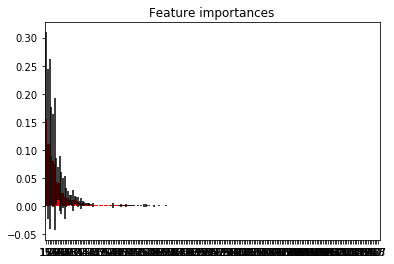

126. feature last_credit_pull_d_Sep-2016 (0.000093)


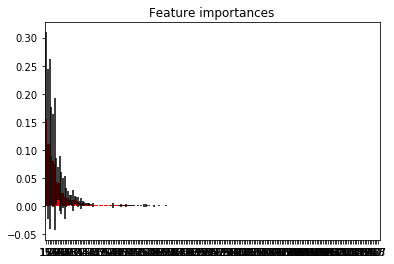

127. feature title_Major purchase (0.000085)


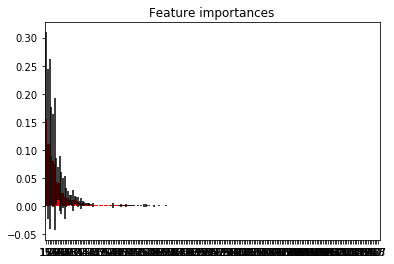

128. feature purpose_major_purchase (0.000081)


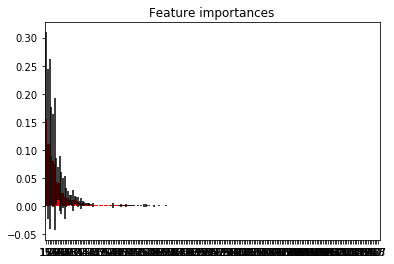

129. feature chargeoff_within_12_mths (0.000070)


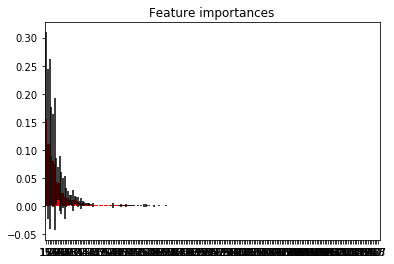

130. feature last_pymnt_d_Jul-2015 (0.000064)


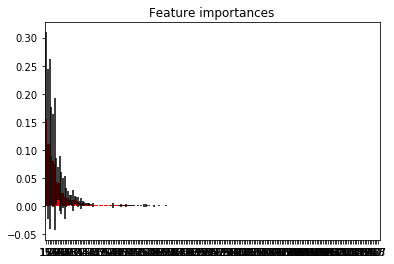

131. feature delinq_amnt (0.000064)


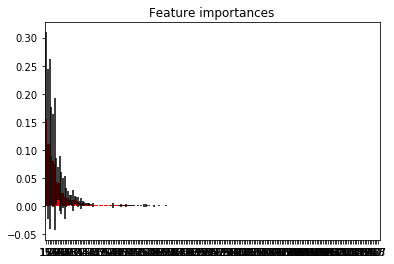

132. feature title_Business (0.000063)


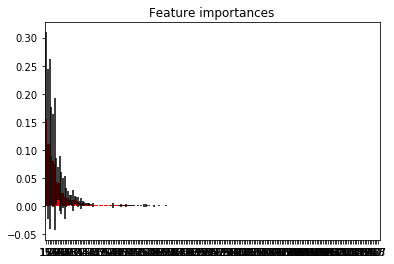

133. feature purpose_small_business (0.000057)


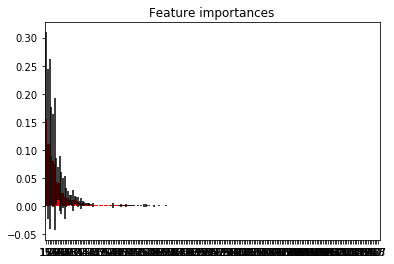

134. feature title_Car financing (0.000051)


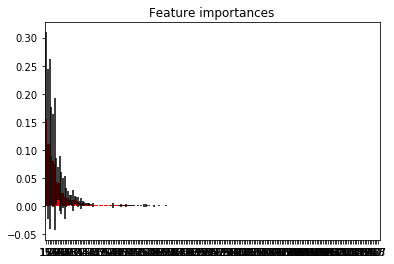

135. feature grade_G (0.000050)


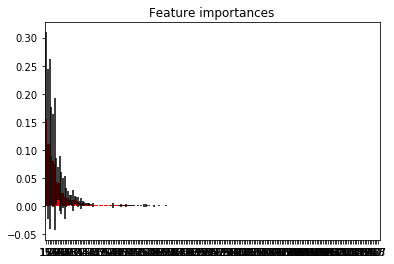

136. feature purpose_house (0.000049)


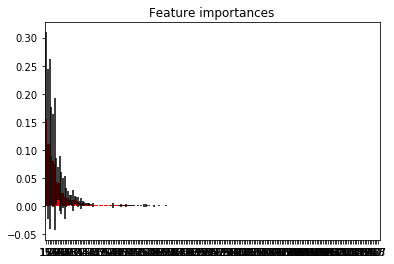

137. feature title_Vacation (0.000047)


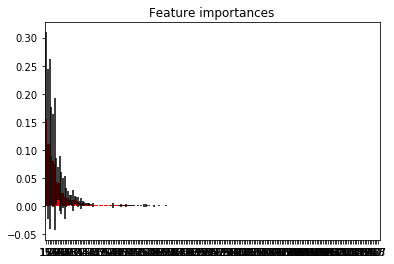

138. feature title_Medical expenses (0.000047)


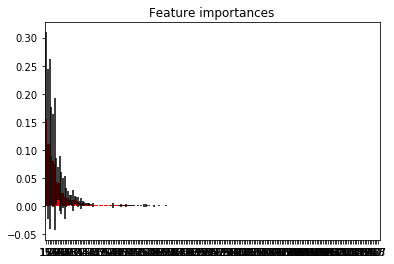

139. feature last_credit_pull_d_Aug-2016 (0.000047)


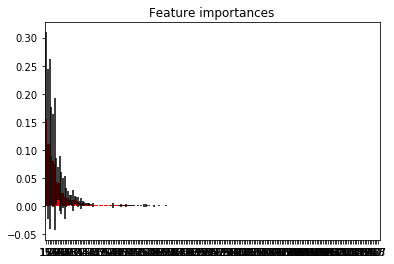

140. feature purpose_moving (0.000045)


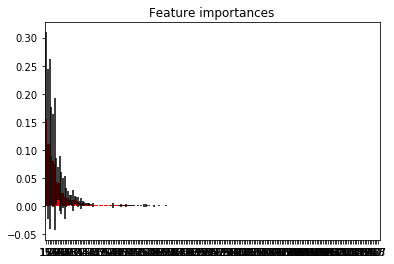

141. feature acc_now_delinq (0.000045)


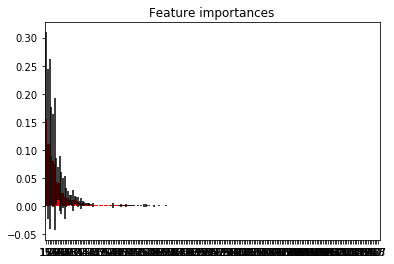

142. feature purpose_car (0.000043)


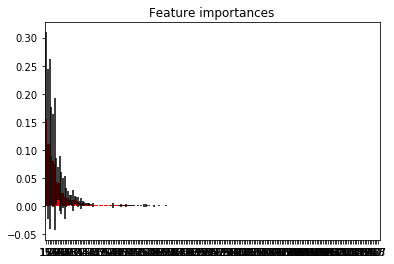

143. feature purpose_medical (0.000042)


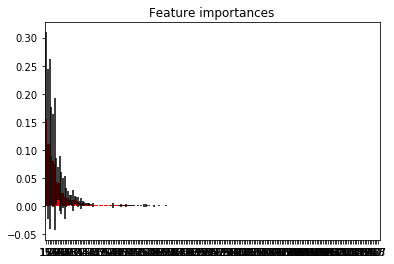

144. feature title_Home buying (0.000042)


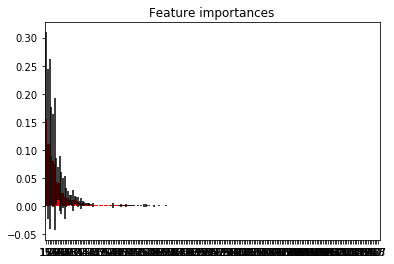

145. feature title_Moving and relocation (0.000035)


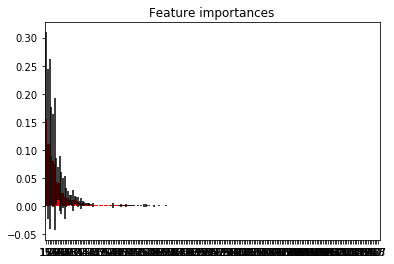

146. feature last_credit_pull_d_May-2016 (0.000032)


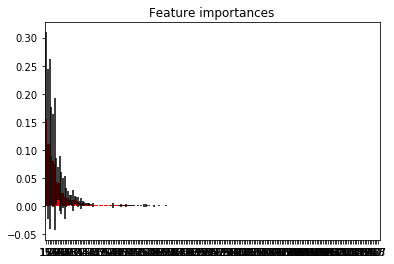

147. feature purpose_vacation (0.000030)


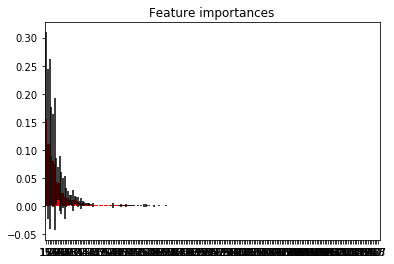

148. feature last_credit_pull_d_Jun-2016 (0.000023)


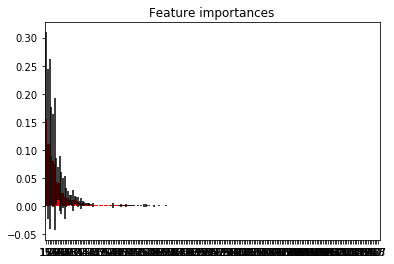

149. feature last_pymnt_d_Jan-2016 (0.000019)


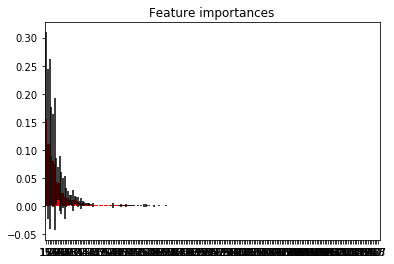

150. feature num_tl_30dpd (0.000017)


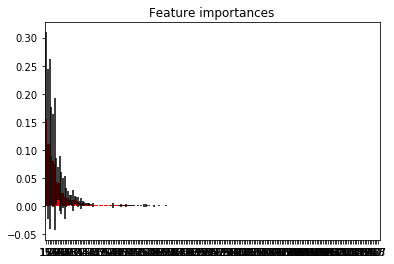

151. feature last_pymnt_d_Sep-2015 (0.000013)


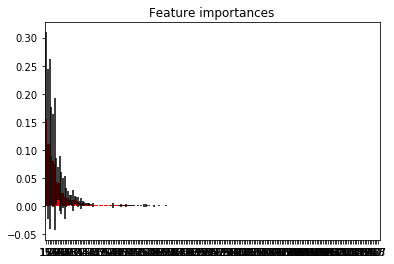

152. feature last_pymnt_d_Dec-2015 (0.000012)


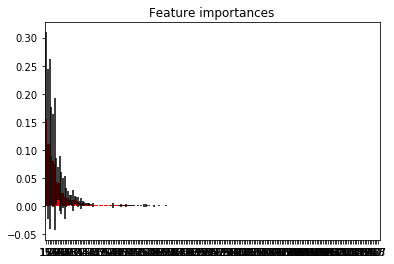

153. feature application_type_JOINT (0.000011)


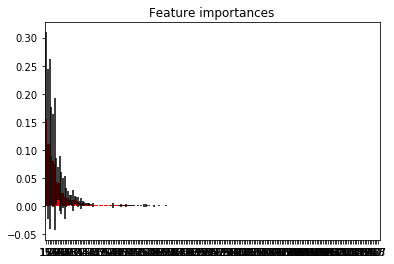

154. feature verification_status_joint_Source Verified (0.000009)


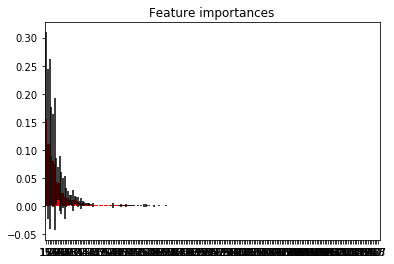

155. feature application_type_INDIVIDUAL (0.000007)


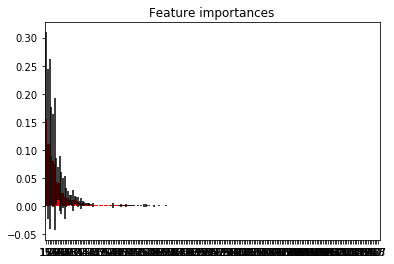

156. feature last_credit_pull_d_Jan-2016 (0.000007)


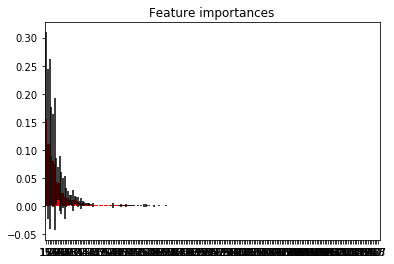

157. feature last_credit_pull_d_Jun-2015 (0.000007)


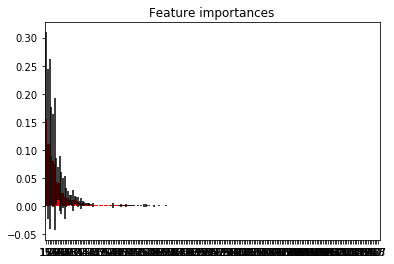

158. feature last_pymnt_d_Feb-2016 (0.000006)


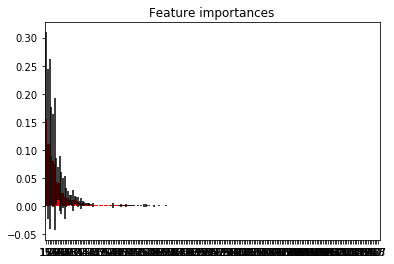

159. feature verification_status_joint_Verified (0.000006)


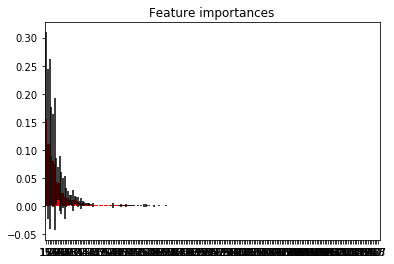

160. feature next_pymnt_d_Mar-2017 (0.000006)


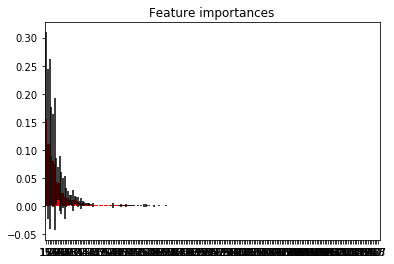

161. feature last_credit_pull_d_Sep-2015 (0.000006)


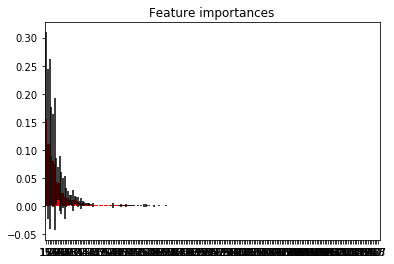

162. feature last_credit_pull_d_Nov-2015 (0.000006)


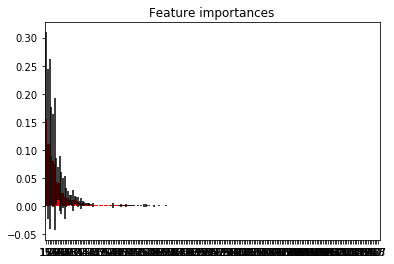

163. feature last_credit_pull_d_Oct-2015 (0.000005)


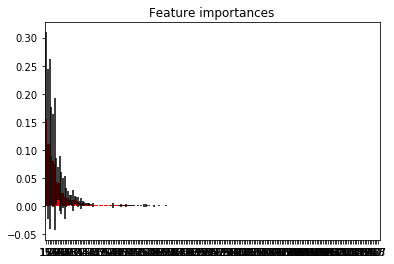

164. feature title_Prescription Drug and Medical Costs (0.000004)


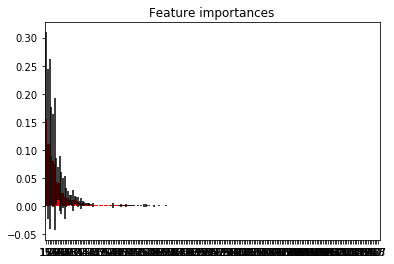

165. feature verification_status_joint_Not Verified (0.000004)


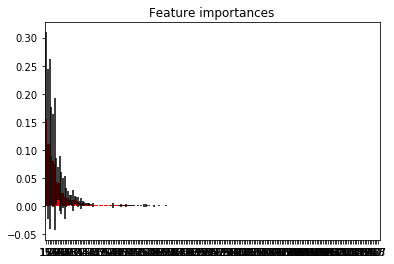

166. feature title_Green loan (0.000004)


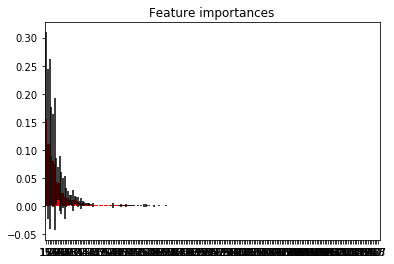

167. feature next_pymnt_d_Jul-2016 (0.000004)


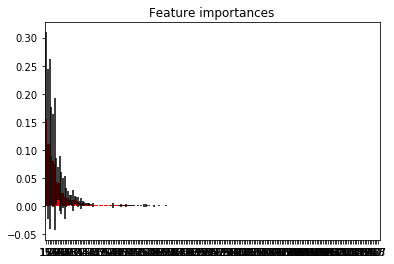

168. feature last_credit_pull_d_Jul-2015 (0.000003)


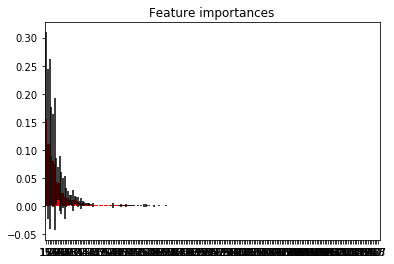

169. feature purpose_renewable_energy (0.000002)


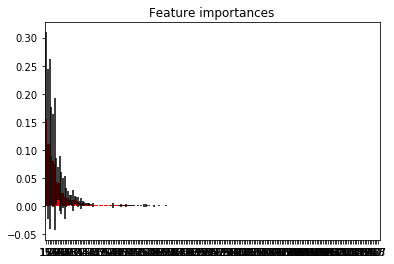

170. feature last_pymnt_d_Mar-2015 (0.000002)


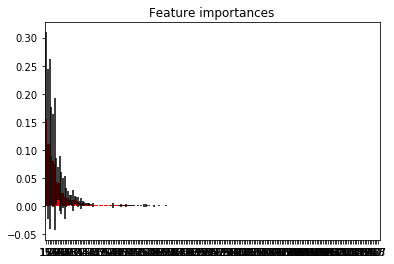

171. feature last_credit_pull_d_Dec-2015 (0.000001)


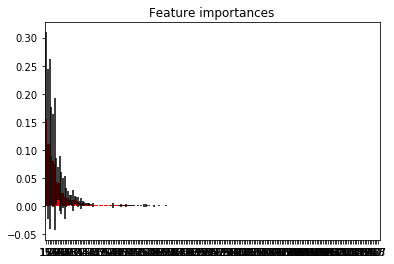

172. feature last_credit_pull_d_May-2015 (0.000001)


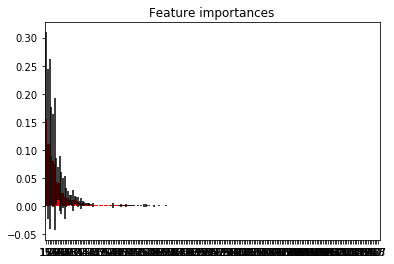

173. feature last_pymnt_d_Apr-2015 (0.000001)


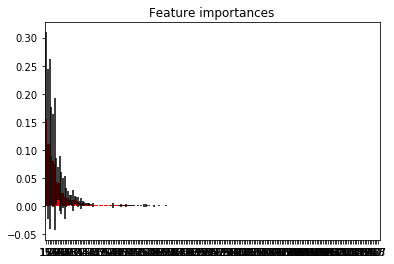

174. feature last_credit_pull_d_Aug-2015 (0.000001)


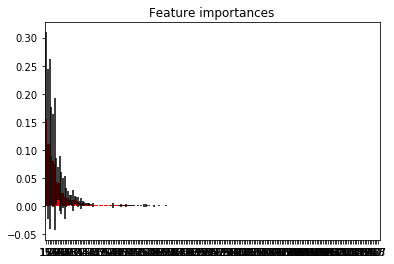

175. feature pymnt_plan_n (0.000000)


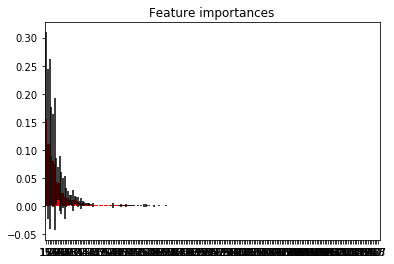

176. feature title_Learning and training (0.000000)


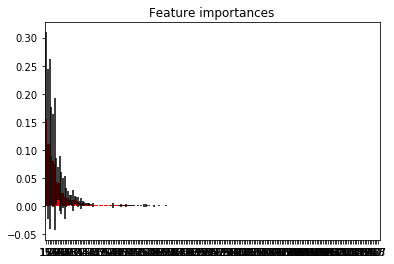

177. feature title_Simple Loan Until Contract Is Completed (0.000000)


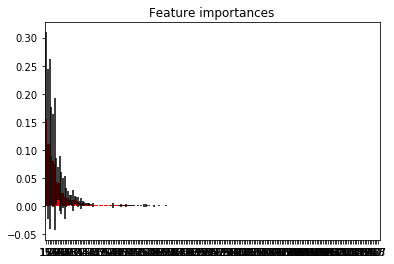

178. feature home_ownership_ANY (0.000000)


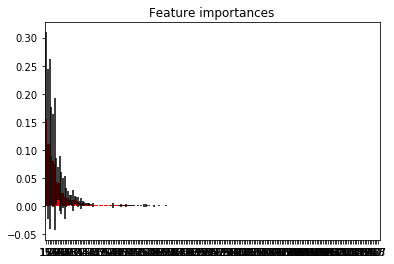

179. feature title_New Baby and New House (CC Consolidate) (0.000000)


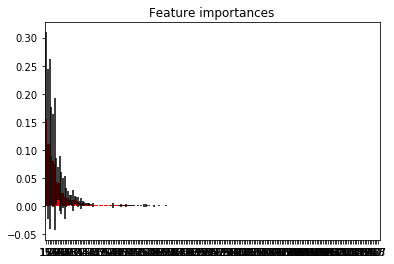

180. feature purpose_educational (0.000000)


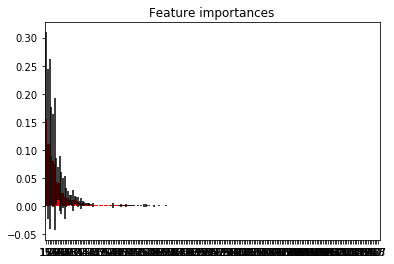

181. feature title_DebtC (0.000000)


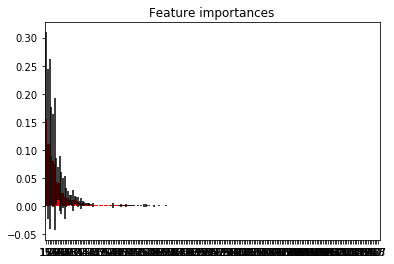

182. feature purpose_wedding (0.000000)


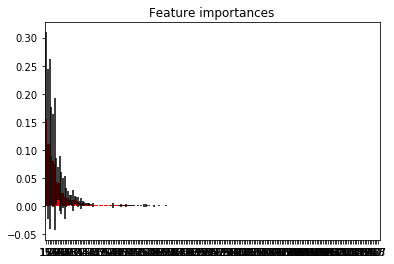

183. feature title_Paying off higher interest cards & auto (0.000000)


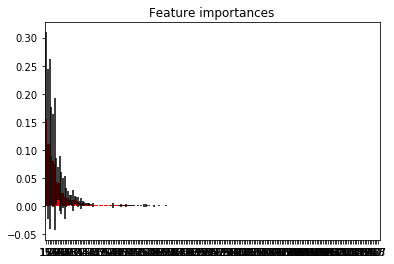

184. feature last_credit_pull_d_Mar-2015 (0.000000)


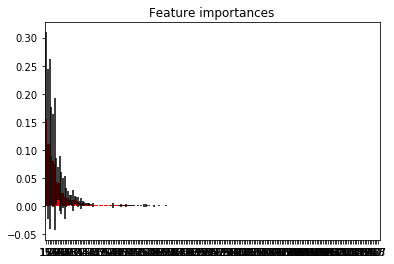

185. feature title_Credit Card/Auto Repair (0.000000)


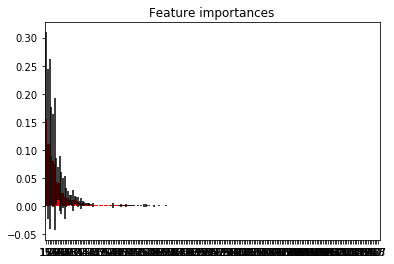

186. feature title_SAVE (0.000000)


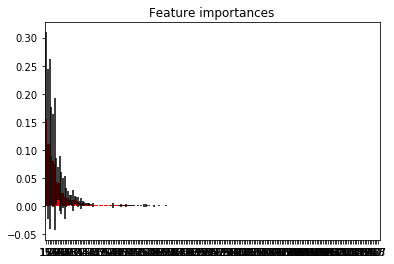

187. feature title_Trying to come back to reality! (0.000000)


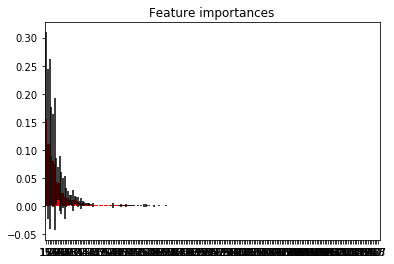

188. feature title_Student Loan (0.000000)


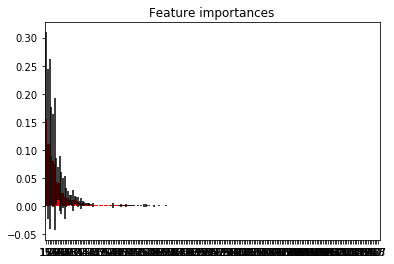

189. feature last_pymnt_d_Jan-2015 (0.000000)


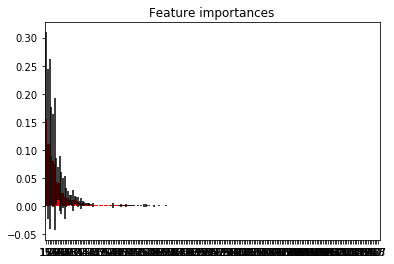

190. feature last_credit_pull_d_Jan-2015 (0.000000)


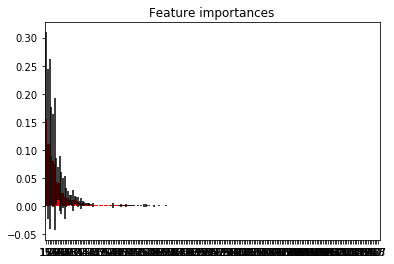

191. feature title_considerate (0.000000)


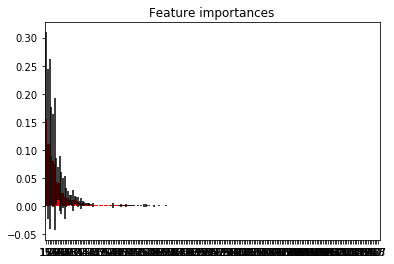

192. feature last_credit_pull_d_Feb-2015 (0.000000)


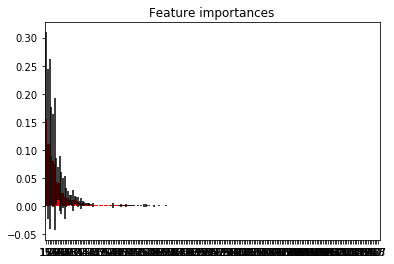

193. feature last_credit_pull_d_Dec-2014 (0.000000)


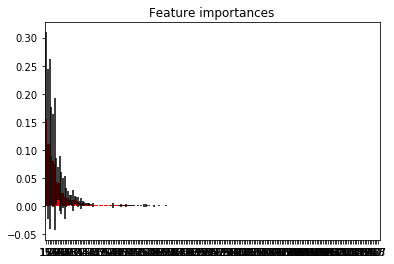

194. feature title_new day (0.000000)


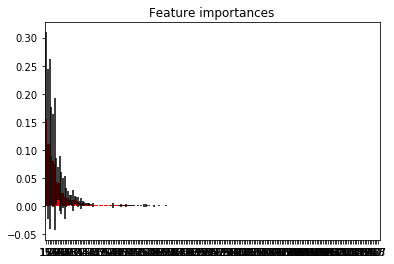

195. feature title_new kitchen for momma! (0.000000)


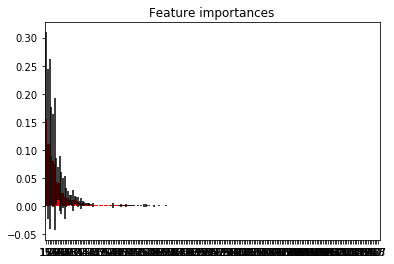

196. feature policy_code (0.000000)


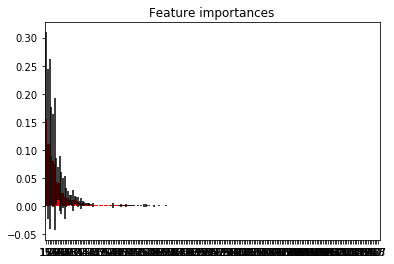

197. feature title_odymeds (0.000000)


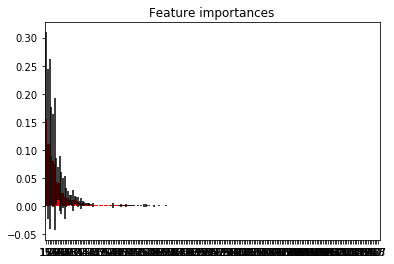

198. feature last_credit_pull_d_Apr-2015 (0.000000)


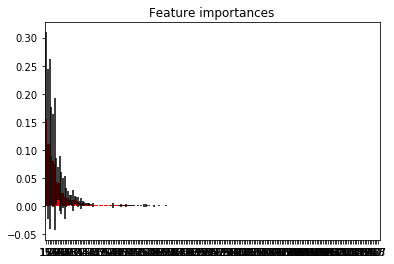

199. feature last_pymnt_d_Feb-2015 (0.000000)


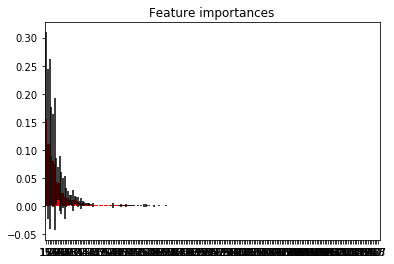

200. feature last_pymnt_d_May-2015 (0.000000)


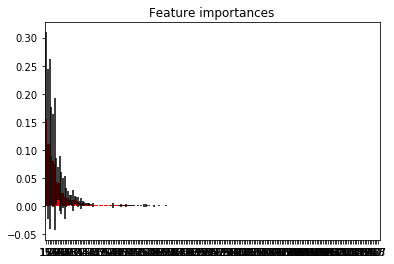

201. feature title_Pay off Lowes Card (0.000000)


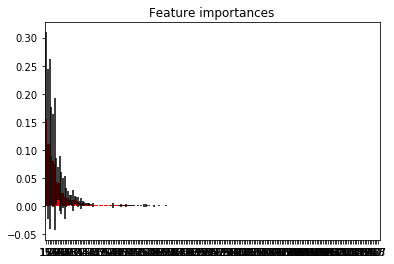

In [58]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
            axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]])
         )
    
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

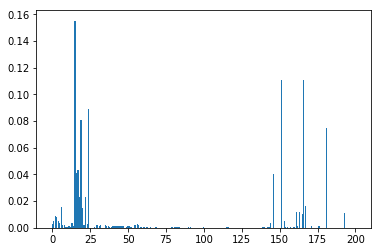

In [68]:
plt.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.show()

The score cross validation reports is the accuracy of the tree.  
Here the  we're about 98% accurate.

That works pretty well but there are potential problems:
1. We didn't do much in the way of feature selection or model refinement so there are a lot of features we don't need
2. There is variance in the scores. Variance could be corrected by increasing the number of estimators but will make it even slower.

# Drill: 
Get rid of as much data as possible without ropping below 90% accuracy average in 10-fold cross validation.  
1. See which features are important using PCA or correlation matrices
2. Can you get 90% accuracy without using anything related to payment amount or outstanding principal?

In [23]:
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [ ]:
y2015.

In [26]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.

X = StandardScaler().fit_transform(X)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00000237e+00  9.97542503e-01 -8.28800909e-03 ...  3.16988700e-02
   1.52046554e-02  2.45114833e-02]
 [ 9.97542503e-01  1.00000237e+00 -8.61952110e-03 ...  3.20023212e-02
   1.53795433e-02  2.47610695e-02]
 [-8.28800909e-03 -8.61952110e-03  1.00000237e+00 ...  8.35951079e-03
   7.08866573e-03  1.43504240e-02]
 ...
 [ 3.16988700e-02  3.20023212e-02  8.35951079e-03 ...  1.00000237e+00
  -3.12145102e-04 -5.16540667e-04]
 [ 1.52046554e-02  1.53795433e-02  7.08866573e-03 ... -3.12145102e-04
   1.00000237e+00 -2.39751698e-04]
 [ 2.45114833e-02  2.47610695e-02  1.43504240e-02 ... -5.16540667e-04
  -2.39751698e-04  1.00000237e+00]]


In [28]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 201).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-1.19909016e-02+0.j]
 [-1.20764106e-02+0.j]
 [ 2.42314115e-01+0.j]
 [ 2.42314115e-01+0.j]
 [ 2.42320572e-01+0.j]
 [ 2.45045745e-02+0.j]
 [ 2.24664723e-01+0.j]
 [ 1.16773804e-01+0.j]
 [ 1.93675394e-02+0.j]
 [ 1.06473597e-03+0.j]
 [ 2.66056769e-02+0.j]
 [ 1.87212786e-01+0.j]
 [-2.96097998e-02+0.j]
 [ 1.66270513e-01+0.j]
 [ 1.74064631e-01+0.j]
 [ 1.43478417e-01+0.j]
 [ 1.43489421e-01+0.j]
 [ 1.91906498e-01+0.j]
 [ 1.91904175e-01+0.j]
 [ 1.58297272e-01+0.j]
 [ 1.78697666e-01+0.j]
 [ 8.42500248e-03+0.j]
 [ 6.73564694e-03+0.j]
 [ 6.94950418e-03+0.j]
 [ 8.87474101e-02+0.j]
 [-8.38559570e-03+0.j]
 [ 0.00000000e+00+0.j]
 [ 3.91490440e-03+0.j]
 [-5.23965702e-03+0.j]
 [ 1.71556556e-01+0.j]
 [ 1.81826170e-01+0.j]
 [ 8.15953172e-02+0.j]
 [ 9.21405385e-02+0.j]
 [ 2.96068727e-05+0.j]
 [ 7.51152027e-04+0.j]
 [ 9.29219455e-02+0.j]
 [-2.88893387e-02+0.j]
 [-3.70186108e-02+0.j]
 [ 1.17034984e-01+0.j]
 [-1.31327015e-02+0.j]
 [ 1.65034082e-01+0.j]
 [ 1.63684997e-01+0.j]
 [ 1.74323357e-01+

 [ 1.62805313e-04+0.j]]
Eigenvalue 72: (0.6345316322367522+0j)
----------------------------------------
Eigenvector 73: 
[[ 3.29914228e-03+0.j]
 [ 3.32916592e-03+0.j]
 [-3.30670823e-02+0.j]
 [-3.30670823e-02+0.j]
 [-3.30784589e-02+0.j]
 [-4.13998687e-02+0.j]
 [-6.07218078e-02+0.j]
 [ 6.06516731e-03+0.j]
 [ 1.49415825e-02+0.j]
 [-6.84480054e-03+0.j]
 [ 6.58506564e-02+0.j]
 [ 2.33900888e-02+0.j]
 [ 3.34627704e-03+0.j]
 [-1.20264130e-03+0.j]
 [-1.53546194e-02+0.j]
 [-1.12420941e-03+0.j]
 [-1.13268179e-03+0.j]
 [ 4.54834243e-02+0.j]
 [ 4.54610647e-02+0.j]
 [ 5.04756966e-02+0.j]
 [-4.07728710e-03+0.j]
 [ 4.69692020e-02+0.j]
 [ 6.51900467e-03+0.j]
 [ 5.86312627e-03+0.j]
 [ 5.56144846e-02+0.j]
 [-2.07687795e-03+0.j]
 [ 0.00000000e+00+0.j]
 [ 2.42995441e-03+0.j]
 [-1.23854119e-03+0.j]
 [ 1.11301015e-02+0.j]
 [ 1.23460696e-02+0.j]
 [ 3.48826337e-03+0.j]
 [ 7.01883607e-03+0.j]
 [ 8.85978266e-03+0.j]
 [ 3.46454168e-03+0.j]
 [-2.04109397e-02+0.j]
 [-2.06758496e-03+0.j]
 [ 1.14064417e-02+0.j]
 [-2.

 [-1.19535546e-02+0.j]]
Eigenvalue 138: (1.056928452660678+0j)
----------------------------------------
Eigenvector 139: 
[[-4.37331813e-03+0.j]
 [-2.78740910e-03+0.j]
 [ 2.64903996e-03+0.j]
 [ 2.64903996e-03+0.j]
 [ 2.63747573e-03+0.j]
 [-1.17864167e-02+0.j]
 [ 5.97884413e-03+0.j]
 [ 1.72686871e-02+0.j]
 [ 2.49418670e-02+0.j]
 [ 1.73185094e-02+0.j]
 [-3.66138668e-02+0.j]
 [ 7.65519244e-03+0.j]
 [ 6.94489920e-03+0.j]
 [-1.21821155e-02+0.j]
 [-4.22598565e-02+0.j]
 [-3.76659628e-03+0.j]
 [-3.77456453e-03+0.j]
 [ 2.92747313e-03+0.j]
 [ 2.92295583e-03+0.j]
 [ 2.62894183e-03+0.j]
 [ 1.42999427e-03+0.j]
 [ 7.02436165e-02+0.j]
 [ 1.60642184e-03+0.j]
 [ 9.87503407e-04+0.j]
 [-3.29114798e-03+0.j]
 [-2.57066331e-02+0.j]
 [ 0.00000000e+00+0.j]
 [-9.20757046e-04+0.j]
 [-2.94788591e-02+0.j]
 [ 3.37652667e-03+0.j]
 [-1.97725841e-02+0.j]
 [-6.61101138e-03+0.j]
 [-1.83733995e-03+0.j]
 [-2.19511141e-02+0.j]
 [-7.26525811e-03+0.j]
 [-6.65083885e-02+0.j]
 [-3.98000624e-02+0.j]
 [-4.31412582e-02+0.j]
 [-4

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


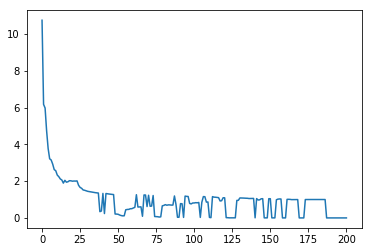

In [29]:
plt.plot(eig_val_cov)
plt.show()

In [38]:
X.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       ...
       'last_credit_pull_d_Nov-2016', 'last_credit_pull_d_Oct-2015',
       'last_credit_pull_d_Oct-2016', 'last_credit_pull_d_Sep-2015',
       'last_credit_pull_d_Sep-2016', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'verification_status_joint_Not Verified',
       'verification_status_joint_Source Verified',
       'verification_status_joint_Verified'],
      dtype='object', length=201)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.05398192 0.03100909 0.03001028 0.02380842]


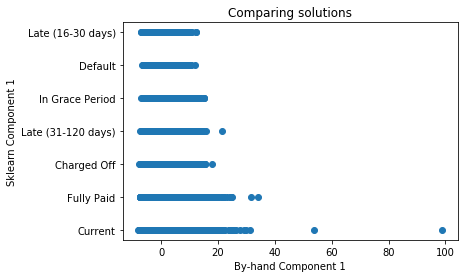

In [30]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [31]:
from sklearn.decomposition import PCA

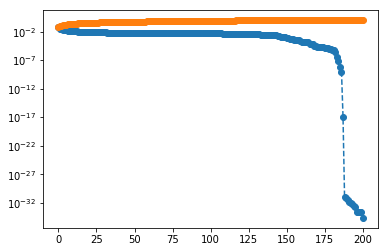

In [33]:
z_scaler = StandardScaler()
data = X
z_data = z_scaler.fit_transform(data)
pca_trafo = PCA().fit(z_data)

plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--o');

In [35]:
pca_trafo.explained_variance_ratio_

array([5.39819192e-02, 3.10090898e-02, 3.00102910e-02, 2.38085460e-02,
       1.89730386e-02, 1.61485790e-02, 1.58141780e-02, 1.46920093e-02,
       1.31939156e-02, 1.28921523e-02, 1.17054573e-02, 1.12642471e-02,
       1.06395200e-02, 1.03628127e-02, 1.02647375e-02, 1.01640595e-02,
       1.01311914e-02, 1.01063990e-02, 1.00783996e-02, 1.00563939e-02,
       1.00289809e-02, 9.86732751e-03, 9.76003149e-03, 9.50640203e-03,
       8.91364650e-03, 8.33104507e-03, 8.08788132e-03, 7.63605439e-03,
       7.54539264e-03, 7.40426756e-03, 7.26111289e-03, 7.18241713e-03,
       7.08061647e-03, 7.02475110e-03, 6.91971111e-03, 6.89686499e-03,
       6.83314402e-03, 6.79215039e-03, 6.68869513e-03, 6.66134453e-03,
       6.57991231e-03, 6.52806467e-03, 6.49043277e-03, 6.42358782e-03,
       6.37717837e-03, 6.33677893e-03, 6.27065098e-03, 6.25025725e-03,
       6.18572633e-03, 6.11502803e-03, 5.99628574e-03, 5.95964972e-03,
       5.88270206e-03, 5.85340690e-03, 5.82335632e-03, 5.81388937e-03,
      

In [36]:
pca_trafo.components_

array([[-1.19909016e-02, -1.20764106e-02,  2.42314115e-01, ...,
         9.26757173e-04,  1.32545702e-03,  3.23759667e-03],
       [ 6.72827780e-02,  6.72953090e-02, -1.82344575e-01, ...,
        -4.87978206e-03, -2.54184365e-03, -5.54961772e-03],
       [-1.53876691e-01, -1.53717748e-01, -7.10304656e-02, ...,
        -1.37734011e-02, -6.06319398e-03, -9.75187695e-03],
       ...,
       [ 0.00000000e+00,  1.87350135e-16, -1.34111004e-02, ...,
         6.88513702e-03,  3.19741357e-03,  5.28977811e-03],
       [ 0.00000000e+00,  2.96637714e-16,  5.77063307e-02, ...,
        -4.52783776e-04, -2.10269888e-04, -3.47868997e-04],
       [ 0.00000000e+00, -2.42861287e-16, -3.13867129e-02, ...,
        -1.84562077e-02, -8.57094471e-03, -1.41797096e-02]])

In [37]:
pca_trafo

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)